## IDs:
ID 1: 204502926 <br>
ID 2: 039065313

#### Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics.pairwise import cosine_similarity

#### Constants:

In [2]:
FOLDER = './ml-100k/'
MAX_COLUMNS_CUTOFF = 5

***

In [3]:
# Read the ratings file which is sorted in ascending order by users and then by items 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(FOLDER+'ua.base',sep='\t',names=column_names) 
ratings = ratings.drop(columns=['timestamp'])

ratings.head()

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [4]:
item_col = ['item_id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',
              'Children','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie_titles = pd.read_csv(FOLDER+"u.item",sep='|',encoding='ISO-8859-1',names=item_col)
movie_titles.head()

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


***
# Question 1: Item Similarity (40 points)

#### a. Build a movie profile vector based on the item features of your choice. Suggested options: item genres

In [5]:
movie_profile = movie_titles[['item_id','Action','Adventure','Animation',
              'Children','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].set_index('item_id')
movie_profile.sort_index(axis=0, inplace=True)

In [6]:
movie_profile.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


#### b. Build a function which provides the 5 most similar items to a specific item. Item to item similarity is calculated using the cosine similarity metric.

In [7]:
# Calculate movie-movie Cosine Similarity dataframe
movie_sim_df = pd.DataFrame(cosine_similarity(movie_profile, movie_profile), index=movie_profile.index, columns=movie_profile.index)

In [8]:
movie_sim_df.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
2,0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
3,0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
4,0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
5,0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [9]:
def get_similar_movie(data_df, movie_id):
    if movie_id not in movie_profile.index: # the item itself is excluded
        result = None, None
    else:
        similar_movie = data_df.sort_values(by=movie_id, ascending=False).index[1:]
        similarity_score = data_df.sort_values(by=movie_id, ascending=False).loc[:, movie_id].tolist()[1:]
        result = similar_movie, similarity_score
    
    return result


def get_top_n_similar_movies(data_df, num_items, movie_id):
    ids = (get_similar_movie(data_df, movie_id)[0])[:n].values
#     scores = (get_similar_movie(movie_id)[1])[:n]
    return ids


def get_movie_name(movie_id):
    return f"{movie_titles[movie_titles['item_id'] == movie_id]['movie title'].values[0]}"

#### c. Use the above function to find most similar items for 2 items from the dataset. Explain your results.

### 1. Item-2-Item Similarity results

In [10]:
n = 5
movie_id_1 = 1
movie_name_1 = get_movie_name(movie_id_1)
top_n_similar_movies1 = get_top_n_similar_movies(movie_sim_df, n, movie_id_1)

print(f'Movie #{movie_id_1} ({movie_name_1}) top matches are:')
for x in top_n_similar_movies1:
    movie_name = get_movie_name(x)
    print(f'{x}: {movie_name}')

Movie #1 (Toy Story (1995)) top matches are:
422: Aladdin and the King of Thieves (1996)
95: Aladdin (1992)
1219: Goofy Movie, A (1995)
243: Jungle2Jungle (1997)
623: Angels in the Outfield (1994)


**We find the movies with the highest Cosine Similarity from the dataframe above ("movie_sim_df") in descending order**

In [11]:
movie_id_2 = 2
movie_name_2 = get_movie_name(movie_id_2)

top_n_similar_movies2 = get_top_n_similar_movies(movie_sim_df, n, movie_id_2)

print(f'Movie #{movie_id_2} ({movie_name_2}) top matches are:')
for x in top_n_similar_movies2:
    movie_name = get_movie_name(x)
    print(f'{x}: {movie_name}')

Movie #2 (GoldenEye (1995)) top matches are:
118: Twister (1996)
1314: Surviving the Game (1994)
1013: Anaconda (1997)
930: Chain Reaction (1996)
566: Clear and Present Danger (1994)


#### d. Use the matrix factorization item representation you built in exercise 1 to find the most similar items for the same 2 items you used above. Compare between the results.

##### Answer
Our steps:
* "1. Item-2-Item Similarity results" (previous question) - We ran the Item Similarity on the movies' genres and showed the results.
* "2. Matrix Factorization results" - We took the vector we calculated in Homework1 and ran the cosine similarity on the latent factor (k=20) again.
* "3. Talk about the results".

#### 2. Matrix Factorization results

In [12]:
with open('./sgd_item_vecs.pkl', 'rb') as f:
    item_vecs = pickle.load(f)

item_vecs_df = pd.DataFrame(item_vecs)
item_vecs_df.index += 1
item_vecs_df.columns += 1

cosine_similarity_MF_item_item = pd.DataFrame(cosine_similarity(item_vecs_df, item_vecs_df), index=item_vecs_df.index, columns=item_vecs_df.index)

result_for_movie_id_1 = get_top_n_similar_movies(cosine_similarity_MF_item_item, n, movie_id_1)
result_for_movie_id_2 = get_top_n_similar_movies(cosine_similarity_MF_item_item, n, movie_id_2)

In [14]:
movie_titles[movie_titles.item_id.isin([movie_id_1])]

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


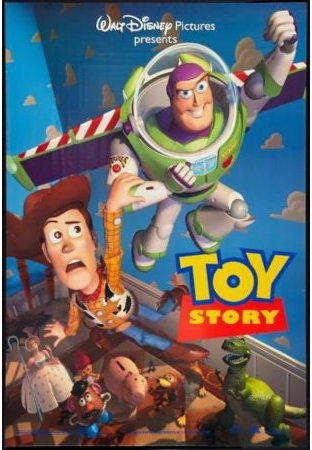

In [15]:
movie_titles[movie_titles.item_id.isin(result_for_movie_id_1)]

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
81,82,Jurassic Park (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Jurassic%20Pa...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
171,172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
173,174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
574,575,City Slickers II: The Legend of Curly's Gold (...,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?City%20Slicke...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
576,577,Coneheads (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Coneheads%20(...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


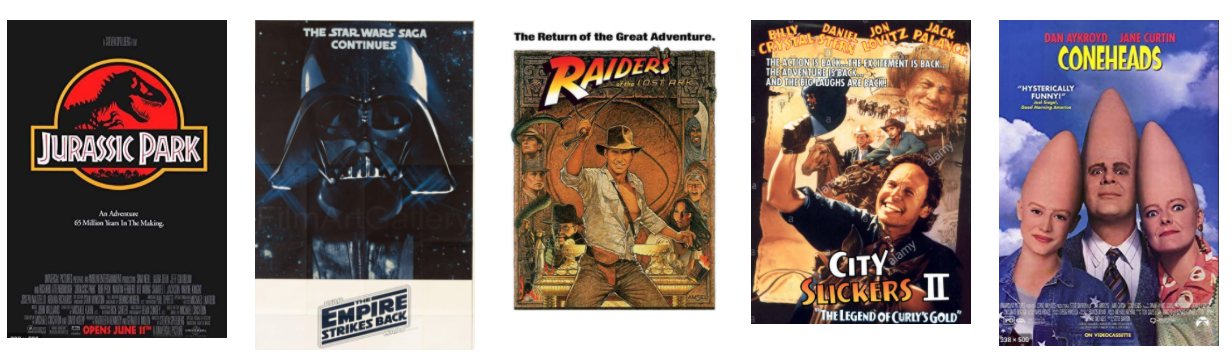

In [16]:
movie_titles[movie_titles.item_id.isin([movie_id_2])]

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


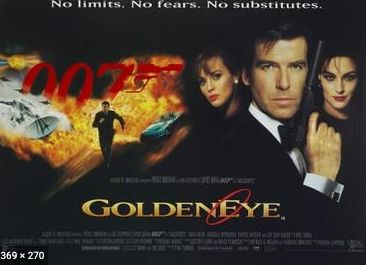

In [17]:
movie_titles[movie_titles.item_id.isin(result_for_movie_id_2)]

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
116,117,"Rock, The (1996)",07-Jun-1996,NaN,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,300,Air Force One (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Air+Force+One...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
975,976,Solo (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Solo%20(1996),0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1015,1016,Con Air (1997),06-Jun-1997,NaN,http://us.imdb.com/M/title-exact?Con%20Air%20%...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1031,1032,Little Big League (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Little%20Big%...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


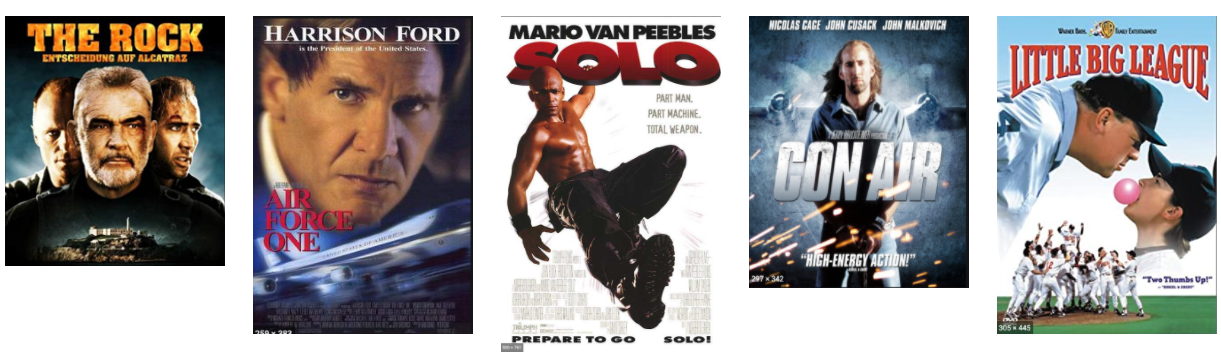

### 3. Talk about the results

We can see that in section 1 the items that were chosen are similar and if we check it by genres - we see the success.
For "Toy Story", almost all movies were, 1 genre away from matching the toy story, out of 18(!)
Regarding "GoldenEye", for all 5 movies - all 18 genres were a match(!)

It's easy to understand why: When you have a vector of binary values, every "wrong" match, changes the cosine similarity to a very different value.
Looking at the results, almost all movies are Disney movies, 3/5 are cartoons, and all are clearly for kids.
For "GoldenEye" - all movies are thrillers/action-packed movies.

For "GoldenEye", all movies were a big hits in cinema, for Toy Story one (Aladdin). it's easy to understand why this happened.
This is not what the model is trying to find.

When we look at the results of the matrix factorization.
First, the results of genre match are much worse. For "Toy Story", one of the matched movies has mismatch on half of his genres, while for "GoldenEye" only 5 were mismatch in one of the movies.

Another iteresting thing is the results themselves: This time, the model chose "similar items": "Jurrasic park", a "Star Wars" movie, and "Conehead" as a match for "Toy Story".
At first glance, nothing is similar, until you consider what it's trying to predict. 
It's trying to predict that: "If you like this movie, you will probably like these movies...", and it is right(!) - I would much rather watch any of the items in the MF list than sitting through "Air bud", "The story of a cross-bred Golden Retriever, who shoots basketball hoops"(?!?!)

Last, looking at "GoldenEye"'s picks by MF, we see mostly action movies like item2item similarity. In fact, two of the picks by the first model were also the picks by the MF model.

But if I compare the items left to right, where the most similar item is the leftmost item, we see the same items for the second pick, "Air Force One", but of course, I would much prefer to see "The rock" - first pick of the MF model - than "Twister".

***
***
# Question 2: Content-based recommendation (60 points)

In [18]:
# Helper functions for Q2

def predict_most_similar_items_per_user(user_id, similarity_matrix, num_items=5):
    result = np.argsort(similarity_matrix[user_profile.index.get_loc(user_id),:])[::-1][:num_items]
    ret_result = [movie_profile.index[i] for i in result]
    return ret_result

#### a. Build a function that recommends 5 most-relevant items to a user.

In [19]:
# Read the ratings file which is sorted in ascending order by users and then by items 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
training_ratings = pd.read_csv(FOLDER+'ua.base', sep='\t', names=column_names) 
training_ratings = training_ratings.drop(columns=['timestamp'])

training_ratings

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
90565,943,1047,2
90566,943,1074,4
90567,943,1188,3
90568,943,1228,3


In [20]:
rating_column = 'rating'

# movie_x_user_df: the ratings dataframe. Rows are item_id, columns are user_id. Missing values are NaN
movie_x_user_df = pd.pivot_table(training_ratings, values=rating_column, index=['item_id'], columns=['user_id'])
movie_x_user_df.sort_index(axis=0, inplace=True)

movie_x_user_df

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# user profile: each user is represented by a vector of the mean rating he gave per item-genre
user_profile = pd.DataFrame(columns = movie_profile.columns)
userIDs = movie_x_user_df.columns

for i in range(len(movie_x_user_df.columns)):
    working_df = movie_profile.mul(movie_x_user_df.iloc[:,i], axis=0)
    # working_df.replace(0, np.NaN, inplace=True)    
    # working_df: for each movie the user rated the rating in all positve genres otherwise 0
    
    # average rating for all rated movies
    user_profile.loc[userIDs[i]] = working_df.mean(axis=0)

# working_df.head() # working_df.shape == (1682, 18)
user_profile

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0.912214,0.458015,0.141221,0.209924,1.156489,0.328244,0.091603,1.557252,0.026718,0.019084,0.171756,0.137405,0.068702,0.603053,0.637405,0.675573,0.351145,0.083969
2,0.557692,0.153846,0.076923,0.211538,0.884615,0.596154,0.000000,2.307692,0.057692,0.173077,0.115385,0.057692,0.211538,1.115385,0.192308,0.769231,0.115385,0.000000
3,0.568182,0.227273,0.000000,0.000000,0.613636,0.590909,0.113636,1.386364,0.000000,0.113636,0.204545,0.090909,0.613636,0.272727,0.431818,0.886364,0.295455,0.000000
4,1.571429,0.642857,0.000000,0.000000,0.714286,1.000000,0.357143,1.071429,0.000000,0.000000,0.000000,0.357143,0.928571,0.214286,0.785714,1.714286,0.285714,0.000000
5,1.000000,0.624242,0.296970,0.393939,1.424242,0.187879,0.000000,0.412121,0.030303,0.030303,0.393939,0.242424,0.054545,0.266667,0.703030,0.278788,0.266667,0.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.615385,0.794872,0.000000,0.000000,1.179487,0.333333,0.000000,1.820513,0.102564,0.000000,0.076923,0.000000,0.102564,1.102564,0.564103,1.000000,0.256410,0.000000
940,0.783505,0.329897,0.092784,0.216495,1.412371,0.309278,0.000000,1.536082,0.000000,0.123711,0.123711,0.195876,0.134021,0.742268,0.597938,0.618557,0.474227,0.000000
941,1.666667,0.750000,0.833333,0.416667,1.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.166667,1.583333,0.000000,0.000000
942,0.971014,0.695652,0.275362,0.623188,1.130435,0.000000,0.000000,1.782609,0.043478,0.072464,0.101449,0.318841,0.521739,1.028986,0.289855,1.014493,0.681159,0.202899


In [22]:
cosine_similarity_user_item = cosine_similarity(user_profile, movie_profile)
cosine_similarity_user_item

array([[0.3441912 , 0.46705438, 0.26713854, ..., 0.60403864, 0.45730497,
        0.61577698],
       [0.22792791, 0.28771229, 0.25887392, ..., 0.8145792 , 0.29770501,
        0.77662176],
       [0.16503347, 0.45231395, 0.41288918, ..., 0.54648312, 0.28584635,
        0.64580102],
       ...,
       [0.51751708, 0.69002278, 0.47308199, ..., 0.        , 0.5228801 ,
        0.        ],
       [0.3817748 , 0.50448813, 0.33062668, ..., 0.64792775, 0.36841258,
        0.5809583 ],
       [0.26169896, 0.64924222, 0.31209159, ..., 0.52368209, 0.37401453,
        0.49042965]])

### b. Test your recommender system on 2 users. Explain your results.

In [23]:
user_id_1 = 1
top_n_similar_movies1 = predict_most_similar_items_per_user(user_id_1, cosine_similarity_user_item)

print(f'User #{user_id_1} top recommended movies are:')
for x in top_n_similar_movies1:
    movie_name = get_movie_name(x)
    print(f'{x}: {movie_name}')

User #1 top recommended movies are:
74: Faster Pussycat! Kill! Kill! (1965)
4: Get Shorty (1995)
1138: Best Men (1997)
337: House of Yes, The (1997)
1296: Indian Summer (1996)


In [24]:
user_id_2 = 2
top_n_similar_movies2 = predict_most_similar_items_per_user(user_id_2, cosine_similarity_user_item)

print(f'User #{user_id_2} top recommended movies are:')
for x in top_n_similar_movies2:
    movie_name = get_movie_name(x)
    print(f'{x}: {movie_name}')

User #2 top recommended movies are:
512: Wings of Desire (1987)
517: Manhattan (1979)
731: Corrina, Corrina (1994)
936: Brassed Off (1996)
1115: Twelfth Night (1996)


The recommended items to a user, are the items with the highest Cosine similarity with the user profile vector.
Both user_vector and movie_vector are represented by the movie genres:
"user_vector" represents how much a user likes a certain genre (values are floats from 0 to 1)
"movie_vector" indicates if the movie is of a certain genre (values are 0 or 1).

Since both have the same structure, we can calculaTe the Cosine similarity between them and it will tell us how likely the user to like a certain movie - if he gave high values for Action movies and low values for Dramas, it will fit closer to a movie with the same characteristics.

### c. Use the MRR metric to evaluate your recommender system on the test set. Use a cutoff value of 5.

Now we go through a similar process, but with data from the test file

In [25]:
# Read the ratings file which is sorted in ascending order by users and then by items 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
test_ratings = pd.read_csv(FOLDER+'ua.test', sep='\t', names=column_names) 
test_ratings = test_ratings.drop(columns=['timestamp'])

test_ratings

,user_id,item_id,rating
0,1,20,4
1,1,33,4
2,1,61,4
3,1,117,3
4,1,155,2
...,...,...,...
9425,943,232,4
9426,943,356,4
9427,943,570,1
9428,943,808,4


In [26]:
rating_column = 'rating'

movie_x_user_df_test = pd.pivot_table(test_ratings, values=rating_column, index=['item_id'], columns=['user_id'])
movie_x_user_df_test.sort_index(axis=0, inplace=True)

movie_x_user_df_test

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
movie_x_user_df_test_fillna = movie_x_user_df_test.fillna(0) # easier to itearate through later

In [109]:
def get_top_movies_for_all_users_from_test(df, num_items=MAX_COLUMNS_CUTOFF):
    l = []
    
    for user_id in range(1, df.shape[1] + 1):
        list_test = sorted([(idx, i) for idx, i in enumerate(df[user_id], start=1) if i != 0], key=lambda x: (x[1], -x[0]), reverse=True)[:num_items]
        l.append([x[0] for x in list_test])

    return l


def get_predicted_top_movies_for_all_users(df, actual_ratings):
    l = []

    for user_id in range(1, df.shape[1] + 1):
        predicted = predict_most_similar_items_per_user(user_id, cosine_similarity_user_item, df.shape[0]+1)
        filter_releveant_items = [i for i in predicted if i in actual_ratings[user_id-1]]
        l.append(filter_releveant_items)
        
    return l


def get_mrr(pred, actual):
    result = 0.0
    
    for user_id in range(1, len(actual) + 1):
        result += get_reciprocal_rank(actual[user_id-1], pred[user_id-1])
    
    return result/len(actual)


def get_reciprocal_rank(pred, actual):
    for idx, (i, j) in enumerate(zip(actual, pred), start=1):
        if i == j:
            return 1/idx
        
    return 0

We get the relevancy values for all movies per user, like we did above but we look only at the movies which exist in both the training AND the test sets.
This is the only way to evalute our recommender system accuracy.
From those

In [110]:
actual_ratings = get_top_movies_for_all_users_from_test(movie_x_user_df_test_fillna)
predicted_ratings = get_predicted_top_movies_for_all_users(movie_x_user_df, actual_ratings)

In [111]:
mrr = get_mrr(predicted_ratings, actual_ratings)
print(f'MRR: {mrr}')

MRR: 0.3646518204312471


#### d. Compare the results of the content based recommender system to the matrix factorization recommender system using the same train and test set. Use the MRR metric for the comparison. 

We take the prediction matrices of the previous HW (Matrix Factorization approach), and the one we calculated here using the Content-Based approach ("predicted_ratings")

In [112]:
with open('./sgd_predictions_matrix.pkl', 'rb') as f:
    MF_predicted_ratings = pickle.load(f)

In [113]:
MF_predicted_ratings_df = pd.DataFrame(MF_predicted_ratings, index=[i for i in range(1, MF_predicted_ratings.shape[0]+1)], columns=[i for i in range(1, MF_predicted_ratings.shape[1]+1)])

In [114]:
MF_ratings = get_top_movies_for_all_users_from_test(MF_predicted_ratings_df.T)
predicted_ratings2 = get_predicted_top_movies_for_all_users(movie_x_user_df, MF_ratings)

In [115]:
MF_CB_mrr = get_mrr(predicted_ratings2, MF_ratings)
print(f'The MRR value between the content-based recommender system and the Mmatrix Factorization recommender system is: {MF_CB_mrr}')

The MRR value between the content-based recommender system and the Mmatrix Factorization recommender system is: 0.35523153057617457


In [116]:
# actual_ratings = get_top_movies_for_all_users_from_test(movie_x_user_df_test_fillna)
MF_pred = get_predicted_top_movies_for_all_users(MF_predicted_ratings_df.T, actual_ratings)

In [117]:
mrr2 = get_mrr(MF_pred, actual_ratings)
print(f'MRR: {mrr2}')

MRR: 0.3646518204312471


In [119]:
a_sum = 0
b_sum = 0

for i, j, k in zip(predicted_ratings, MF_pred, actual_ratings):
    a = get_reciprocal_rank(i,k)
    b = get_reciprocal_rank(j,k)
    
    if a!=0 or b!= 0:
#         print(i, a, j, b, k)
    a_sum+=a
    b_sum+=b
    
print(a_sum, b_sum, a_sum/1682, b_sum/1682)

IndentationError: expected an indented block (<ipython-input-119-728dd21629e0>, line 10)

#### e. Discuss the advantages and disadvantages of matrix factorization vs. content based recommender systems (refer to accuracy, complexity, explainaiblity and new user\new items) and when will you recommend using each approach. 

By using the <u>**MF model**</u>, recommendations are based on **similar users'** taste (User-2-User).<br>
For example, by rating a movie it finds another user, U, that gave a similar rating to that movie and recommends a second movie that U liked.<br>

**Disadvantages**: 
* This can be problematic and inaccurate if 2 users happen to like the same action movies, but their taste regarding horror movies is completely different. The system will predict similar ratings on horror movies for both users, and it will make the system look unreliable.<br>
* Moreover, this model tends to predict high ratings to popular movies becasue many users like these (by definition of "popular"), so recommending these is obvious and not useful, but it's difficult to predict a rating to an unpopular movie (not many rating are available).<br>
* Cold start: The system needs enough users and enugh ratings for items to be able to predict useful ratings.
* Popularity-bias: It's hard to recommend an item to a user with a unique taste, simply becasue there aren't many users to compare him to.
* A user may not understand why the system predicted a certain item - if it's not in the domain he is usually looking in.
* This is not considering the context in which the user chooses certain items - i.e watching a movie with friends/alone

**Advantages**: 
* When there are many movie ratings and many users that gave ratings (a dense matrix), the recommendations can be more accurate and the system is more rich with predictions (on many items in many domains).

**Complexity**: O(m*n) - number of items * users<br>
The problem is that every now and then (when there are more and more items/user ratings), the systems needs to compute new recommendations predictions because there is more data to rely on (Nearest neighbor algorithms require computations that grows with both the number of customers and products).

<font color='orange'>**It is recommended to use this model when there are many users and items' ratings: It will be more hollistic and will be better at suggesting items the users would not consider purchasing before ---> more engagement of users = more sales for the business**</font>

---

With <u>**Content-based**</u> systems, recommendations are based on **similar items'** features.<br>
Recommend items similar to those a user has liked in the past - no other users are needed here.<br>

**Disadvantages**: 
* Improvement rate is slow since it requires many ratings per user
* Superficiality (domain expertise): The system might predict more and more items in the same domain, and the user may not broden his horizons and explore different items (will only watch action movies, and will not buy items from different departments - this is very bad for business if you are not engaging with all its products and buy less overall)
* This is not considering the context in which the user chooses certain items - i.e watching a movie with friends/alone
* Considered less accurate

**Advantages**:
* Easy to explain why the system predicted that a user will like/dislike a specific item.
* Can fit unique tastes.
* Cold start: It DOESN'T MATTER if an item is unpopular or even COMPLETELY NEW - its features are what's really matter and if you like/dislike a similar item, the systems predicts your rating for this one easily.
* In most cases, there are more ratings per item than per user.

**Complexity**: O(m) - number of items<br>
The system only needs user's previous item ratings to predict a new recommended item.

<font color='orange'>**It is recommended to use this model when there are many more items than users, and when there are not enough ratings per item because based on a user's taste - the system only looks at previously rated similar items by features.**</font>

---
<font color='red'>**It is important to mention that Hybrid Methods utilizes the advantages of both methods above, and gives recommendations using both ways.**</font>